## Import Libraries
Loading all libraries to be used

In [150]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


## Web Crawling
Build Data Set from Internet

In [151]:
categories = ['Technology', 'Sports', 'World', 'Business', 'Politics', 'Entertainment', 'Science', 'Travel', 'Fashion', 'Education']

title = []
category = []
content = []

for categoryIndex in categories:
    for i in range(1, 101):
        # example
        # https://inshorts.com/api/en/search/trending_topics/business?page=4&type=NEWS_CATEGORY
        url = f'https://inshorts.com/api/en/search/trending_topics/{categoryIndex.lower()}?page={i}&type=NEWS_CATEGORY'
        response = requests.get(url)
        data = json.loads(response.text)

        for news in data['data']['news_list']:
            if 'news_obj' in news:
                title.append(news['news_obj']['title'])
                category.append(categoryIndex)
                #category.append(news['news_obj']['category_names'])
                content.append(news['news_obj']['content'])

news_df = pd.DataFrame({'title': title, 'category': category, 'content': content})

In [152]:
# title = []
# category = []
# content = []

# with open('bloomberg_quint_news.json', 'r') as file:
#     data = json.load(file)
#     for item in data:
#         title.append(item['title'])
#         category.append(item['category'])
#         content.append(item['short_description'])
                        
# df2 = pd.DataFrame({'title': title, 'content': content, 'category': category})
# df2 = df2[(df2['category'] == 'Technology')]
# df2 = df2.reset_index(drop=True)
# print(len(df2))

# news_df = pd.concat([df1, df2], ignore_index=True)

In [153]:
# print df
print("Data Frame Printout")
print(len(news_df))
print(news_df.category.value_counts())
print(news_df.head(5), "\n")

# to csv
news_df.to_csv('news.csv')

Data Frame Printout
9859
category
World            997
Business         997
Sports           996
Technology       992
Science          992
Education        992
Entertainment    991
Politics         988
Travel           957
Fashion          957
Name: count, dtype: int64
                                               title    category  \
0  29 Nations Unanimously Accept New Delhi’s AI D...  Technology   
1  Deepfakes need societal solution, not just tec...  Technology   
2  I am furious: Elon Musk's mother as she accuse...  Technology   
3  Was Urinated On: Woman Accuses Tech CEO Of Mak...  Technology   
4         M2P Fintech buys Goals101 in software deal  Technology   

                                             content  
0  The Global Partnership on Artificial Intellige...  
1  OpenAI's Vice President of Global Affairs Anna...  
2  Elon Musk's mother Maye Musk has accused US Pr...  
3  A woman has accused a co-founder of a San Fran...  
4  M2P Fintech, a startup that provides softwa

## Text Preprocessing

In [154]:
# Lower Case
news_df['content'] = news_df['content']\
            .apply(lambda x: " ".join(x.lower() for x in x.split()))
news_df['title'] = news_df['title']\
            .apply(lambda x: " ".join(x.lower() for x in x.split()))
print('Lower Case')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

Lower Case
                                               title    category  \
0  29 nations unanimously accept new delhi’s ai d...  Technology   
1  deepfakes need societal solution, not just tec...  Technology   
2  i am furious: elon musk's mother as she accuse...  Technology   
3  was urinated on: woman accuses tech ceo of mak...  Technology   
4         m2p fintech buys goals101 in software deal  Technology   
5             vc firms eye profits on bookmyshow bet  Technology   
6  musk's ai chatbot grok now available in india,...  Technology   
7  why is tesla recalling nearly all its cars sol...  Technology   
8  openai to pay germany's axel springer for news...  Technology   
9  nations unanimously adopt new delhi declaratio...  Technology   

                                             content  
0  the global partnership on artificial intellige...  
1  openai's vice president of global affairs anna...  
2  elon musk's mother maye musk has accused us pr...  
3  a woman has accus

In [155]:
import string

# Removing Punctuation
news_df['content'] = news_df['content']\
            .apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
print('Removing Punctuation')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

Removing Punctuation
                                               title    category  \
0  29 nations unanimously accept new delhi’s ai d...  Technology   
1  deepfakes need societal solution not just tech...  Technology   
2  i am furious elon musks mother as she accuses ...  Technology   
3  was urinated on woman accuses tech ceo of maki...  Technology   
4         m2p fintech buys goals101 in software deal  Technology   
5             vc firms eye profits on bookmyshow bet  Technology   
6  musks ai chatbot grok now available in india 4...  Technology   
7  why is tesla recalling nearly all its cars sol...  Technology   
8  openai to pay germanys axel springer for news ...  Technology   
9  nations unanimously adopt new delhi declaratio...  Technology   

                                             content  
0  the global partnership on artificial intellige...  
1  openais vice president of global affairs anna ...  
2  elon musks mother maye musk has accused us pre...  
3  a woman

In [156]:
# Removing Stopwards
from nltk.corpus import stopwords
stop = stopwords.words('english')
news_df['content'] = news_df['content']\
            .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

                                               title    category  \
0  29 nations unanimously accept new delhi’s ai d...  Technology   
1  deepfakes need societal solution tech solution...  Technology   
2  furious elon musks mother accuses biden target...  Technology   
3   urinated woman accuses tech ceo making sex slave  Technology   
4            m2p fintech buys goals101 software deal  Technology   
5                vc firms eye profits bookmyshow bet  Technology   
6  musks ai chatbot grok available india 46 count...  Technology   
7                tesla recalling nearly cars sold us  Technology   
8  openai pay germanys axel springer news content...  Technology   
9  nations unanimously adopt new delhi declaratio...  Technology   

                                             content  
0  global partnership artificial intelligence gpa...  
1  openais vice president global affairs anna mak...  
2  elon musks mother maye musk accused us preside...  
3  woman accused cofounder san 

In [157]:
# Removing accented characters
import unicodedata
news_df['content'] = news_df['content']\
            .apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

                                               title    category  \
0  29 nations unanimously accept new delhis ai de...  Technology   
1  deepfakes need societal solution tech solution...  Technology   
2  furious elon musks mother accuses biden target...  Technology   
3   urinated woman accuses tech ceo making sex slave  Technology   
4            m2p fintech buys goals101 software deal  Technology   
5                vc firms eye profits bookmyshow bet  Technology   
6  musks ai chatbot grok available india 46 count...  Technology   
7                tesla recalling nearly cars sold us  Technology   
8  openai pay germanys axel springer news content...  Technology   
9  nations unanimously adopt new delhi declaratio...  Technology   

                                             content  
0  global partnership artificial intelligence gpa...  
1  openais vice president global affairs anna mak...  
2  elon musks mother maye musk accused us preside...  
3  woman accused cofounder san 

In [158]:
# Word Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

print(news_df['content'].iloc[0])
tokensContent = word_tokenize(news_df['content'].iloc[0])
print('Tokens')
print(tokensContent, '\n')

print(news_df['title'].iloc[0])
tokensTitle = word_tokenize(news_df['title'].iloc[0])
print('Tokens')
print(tokensTitle, '\n')
# to csv
news_df.to_csv('news.csv')

global partnership artificial intelligence gpai summit congregation 29 member nations including european union eu unanimously adopted new delhi resolution aims promote collaborative effort member countries ai according niti aayog ai potential contribute 1 tn indias economy 2035
Tokens
['global', 'partnership', 'artificial', 'intelligence', 'gpai', 'summit', 'congregation', '29', 'member', 'nations', 'including', 'european', 'union', 'eu', 'unanimously', 'adopted', 'new', 'delhi', 'resolution', 'aims', 'promote', 'collaborative', 'effort', 'member', 'countries', 'ai', 'according', 'niti', 'aayog', 'ai', 'potential', 'contribute', '1', 'tn', 'indias', 'economy', '2035'] 

29 nations unanimously accept new delhis ai declaration
Tokens
['29', 'nations', 'unanimously', 'accept', 'new', 'delhis', 'ai', 'declaration'] 


[nltk_data] Downloading package punkt to /Users/wing-/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('member', 2), ('ai', 2), ('global', 1), ('partnership', 1), ('artificial', 1), ('intelligence', 1), ('gpai', 1), ('summit', 1), ('congregation', 1), ('29', 1), ('nations', 1), ('including', 1), ('european', 1), ('union', 1), ('eu', 1), ('unanimously', 1), ('adopted', 1), ('new', 1), ('delhi', 1), ('resolution', 1)]


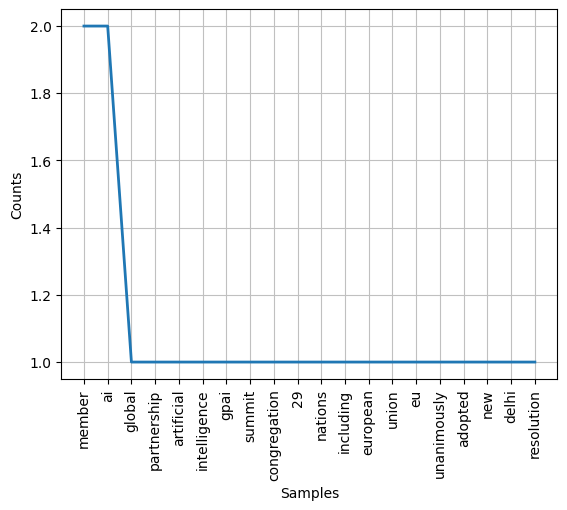

[('29', 1), ('nations', 1), ('unanimously', 1), ('accept', 1), ('new', 1), ('delhis', 1), ('ai', 1), ('declaration', 1)]


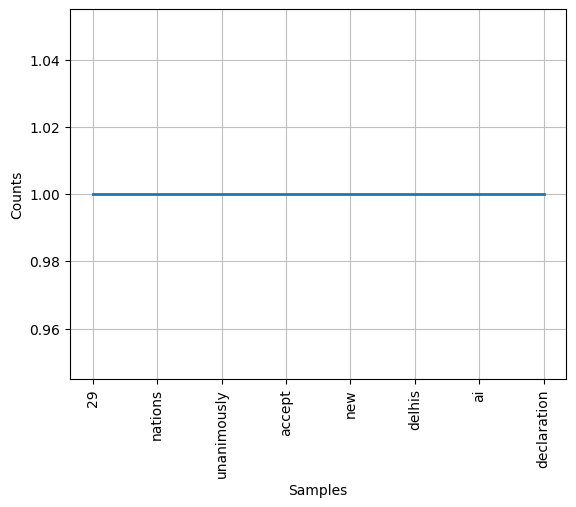

In [159]:
# Frequency Plot
fdist = nltk.FreqDist(tokensContent)
print(fdist.most_common(20))

fdist.plot(20,cumulative=False)
plt.show()

fdist = nltk.FreqDist(tokensTitle)
print(fdist.most_common(10))

fdist.plot(10,cumulative=False)
plt.show()

In [160]:
# Lemmatization
nltk.download('wordnet')
lem = nltk.WordNetLemmatizer()
news_df['content'][:10].apply(lambda x: " ".join([lem.lemmatize(word, 'v') for word in x.split()]))
news_df['title'][:10].apply(lambda x: " ".join([lem.lemmatize(word, 'v') for word in x.split()]))
print('Lemmatization')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

Lemmatization
                                               title    category  \
0  29 nations unanimously accept new delhis ai de...  Technology   
1  deepfakes need societal solution tech solution...  Technology   
2  furious elon musks mother accuses biden target...  Technology   
3   urinated woman accuses tech ceo making sex slave  Technology   
4            m2p fintech buys goals101 software deal  Technology   
5                vc firms eye profits bookmyshow bet  Technology   
6  musks ai chatbot grok available india 46 count...  Technology   
7                tesla recalling nearly cars sold us  Technology   
8  openai pay germanys axel springer news content...  Technology   
9  nations unanimously adopt new delhi declaratio...  Technology   

                                             content  
0  global partnership artificial intelligence gpa...  
1  openais vice president global affairs anna mak...  
2  elon musks mother maye musk accused us preside...  
3  woman accused 

[nltk_data] Downloading package wordnet to /Users/wing-/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [161]:
# Team frequency (TF)
tf1 = (news_df['content'][1:2]).apply(lambda x: pd.Series(x.split(" ")).value_counts()).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,solution,2
1,openais,1
2,require,1
3,work,1
4,donecan,1


In [162]:
# Inverse Document Frequency (IDF)
for i,word in enumerate(tf1['words']):
  try:
    tf1.loc[i, 'idf'] = np.log(news_df.shape[0]/(len(news_df[news_df['content'].str.contains(word)])))
  except:
    pass
tf1.head()

,words,tf,idf
0,solution,2,4.392119
1,openais,1,5.135697
2,require,1,4.298300
3,work,1,2.622460
4,donecan,1,9.196140


In [163]:
# TF-IDF
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()
print(tf1.head())

      words  tf       idf     tfidf
0  solution   2  4.392119  8.784238
1   openais   1  5.135697  5.135697
2   require   1  4.298300  4.298300
3      work   1  2.622460  2.622460
4   donecan   1  9.196140  9.196140


### WordCloud


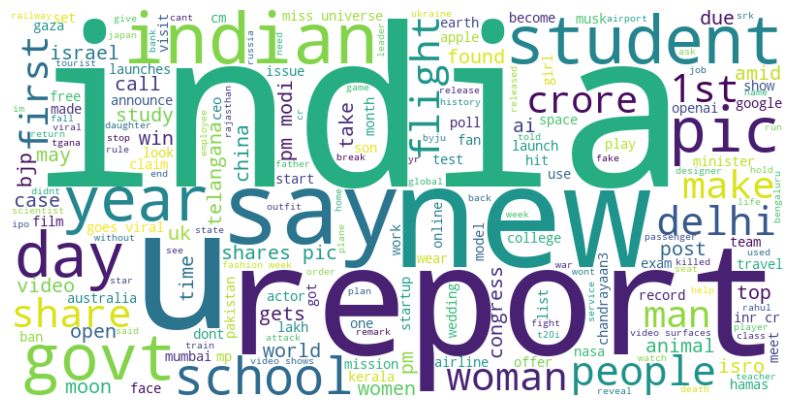

In [164]:
from wordcloud import WordCloud

# Concatenate all news articles into a single string
text = ' '.join(news_df['title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Sampling data
Count the number of diffrent labels in dataset and plot a pie chart distribution.

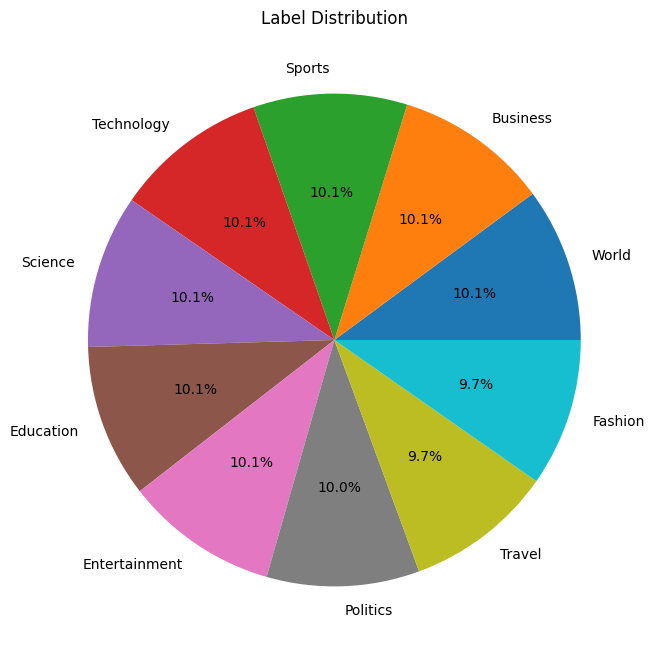

In [165]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each label
label_counts = news_df['category'].value_counts()

# Plot a pie chart of label distribution
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Label Distribution')
plt.show()

## Text Classification

Model Evaluation

In [166]:
# Split the data into training and test sets
training_corpus, test_corpus = train_test_split(news_df, test_size=0.2, random_state=42)

# Print the sizes of the training and test sets
print("Training Corpus Size:", len(training_corpus))
print("Test Corpus Size:", len(test_corpus))


# Preparing data for SVM model (using the same training_corpus, test_corpus from 
# naive bayes example)
train_data = []
train_labels = []
for index, row in training_corpus.iterrows():
    train_data.append(row['title'])
    train_labels.append(row['category'])

test_data = []
test_labels = []
for index, row in test_corpus.iterrows():
    test_data.append(row['title'])
    test_labels.append(row['category'])

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8)

# Train the feature vectors
train_vectors = vectorizer.fit_transform(train_data)

# Apply model on test data
test_vectors = vectorizer.transform(test_data)

# Perform classification with SVM, kernel=linear
model = svm.SVC(kernel='linear')
model.fit(train_vectors, train_labels)
prediction = model.predict(test_vectors)
print(prediction)

# Additional testing with new data
extra_test_data = [
    "Australia name playing XI for first Test against Pakistan", #Sports
    "Actress Hilary Duff pregnant with her fourth baby, shares pic", #Entertainment
    "Elon Musk's Tesla recalls two million cars in US over Autopilot defect", #Technology
]

# Convert extra test data to feature vectors
extra_test_vectors = vectorizer.transform(extra_test_data)
# Make predictions on extra test data
extra_prediction = model.predict(extra_test_vectors)
print("Extra Test Prediction:", extra_prediction)

Training Corpus Size: 7887
Test Corpus Size: 1972
['Fashion' 'Business' 'Entertainment' ... 'World' 'Sports' 'Politics']
Extra Test Prediction: ['Sports' 'Entertainment' 'Technology']


In [167]:
print(classification_report(test_labels, prediction))

               precision    recall  f1-score   support

     Business       0.41      0.46      0.44       207
    Education       0.88      0.77      0.82       200
Entertainment       0.70      0.68      0.69       211
      Fashion       0.86      0.82      0.84       190
     Politics       0.80      0.84      0.82       207
      Science       0.86      0.80      0.83       188
       Sports       0.82      0.78      0.80       199
   Technology       0.47      0.49      0.48       204
       Travel       0.80      0.82      0.81       181
        World       0.63      0.68      0.66       185

     accuracy                           0.71      1972
    macro avg       0.72      0.71      0.72      1972
 weighted avg       0.72      0.71      0.71      1972


In [169]:
# show random news and not repeat
selected_news = set()  
def show_random_news(category):
    filtered_df = news_df[news_df['category'] == category]
    available_news = filtered_df[~filtered_df['title'].isin(selected_news)]  
    sample_size = min(5, len(available_news)) 
    random_news = available_news.sample(n=sample_size, replace=False)
    for index, news in random_news.iterrows():
        selected_news.add(news['title'])  
        print("Title:", news['title'])
        print("Category:", news['category'])
        print("Content:", news['content'])
        print("\n")

category = input("Enter a category: ")

show_random_news(category)

TypeError: 'str' object is not callable

In [11]:
from youtube_transcript_api import YouTubeTranscriptApi

def generate_transcript(id):
	transcript = YouTubeTranscriptApi.get_transcript(id)
	script = ""

	for text in transcript:
		t = text["text"]
		if t != '[Music]':
			script += t + " "
		
	return script, len(script.split())

# example: 
# https://www.youtube.com/watch?v=PDMIFXW5QB0&ab_channel=BBCNews

input_url = input("Enter a youtube video url: ")
id = input_url.split('=')[1]
transcript, no_of_words = generate_transcript(id)
print(transcript)

now to the story of a sea monster with 130 razor sharp teeth the biting force of a T-Rex and a skull measuring 2 m it might sound like the stuff of Legend but this creature really did exist around 75 million years ago and it was called plaur and a fossil of its enormous jaws has been now found ofd dorsit Jurassic Coast our science editor Rebecca Morel went for an exclusive look okay oh wow there you go it's huge unveiling a Jurassic sea monster this is the 2 m long skull of a pliosaur one of the most fearsome Predators the planet has ever seen so he's got big teeth excellent for stabbing and killing its prey it doesn't chew its food it just breaks into bits and dig it back to get in and digest the bone and everything huge stes led the efforts to unearth and prepare this ancient aquatic Beast it's what makes this unque unique is it's complete so the lower jaws and the upper skull are meshed together as it would be in life to find that I think worldwide there's hardly any specimens ever 

In [10]:
from transformers import pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = input("Enter an article: ")
if len(ARTICLE.split()) > 1024:
    print("Please enter a shorter article.")
else:
    print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

[{'summary_text': 'Fossil of a sea monster with 130 razor sharp teeth the biting force of a T-Rex and a skull measuring 2 m has been found on the Jurassic Coast in Dorset. This creature really did exist around 75 million years ago and it was called plaur and a fossil of its enormous jaws has been now found ofd dorsit Jurassic Coast.'}]


# Multinomial Naive Bayesian
Print the confusion matrix and heat map.

               precision    recall  f1-score   support

     Business       0.52      0.51      0.52       207
    Education       0.76      0.89      0.82       175
Entertainment       0.79      0.73      0.76       201
      Fashion       0.85      0.82      0.83       195
     Politics       0.84      0.87      0.85       218
      Science       0.79      0.82      0.80       190
       Sports       0.86      0.82      0.84       199
   Technology       0.45      0.42      0.43       204
       Travel       0.78      0.76      0.77       196
        World       0.65      0.67      0.66       188

     accuracy                           0.73      1973
    macro avg       0.73      0.73      0.73      1973
 weighted avg       0.73      0.73      0.73      1973

[4 0 4 ... 6 4 4]
['Politics' 'Business' 'Politics' ... 'Sports' 'Politics' 'Politics']


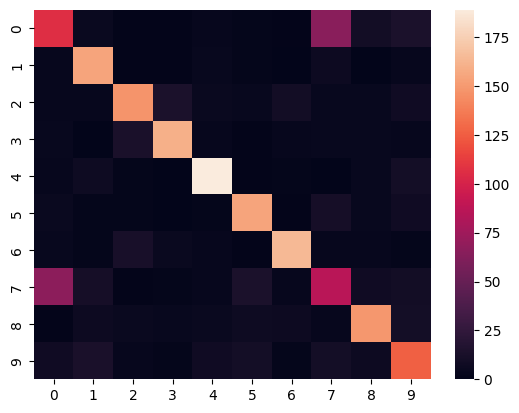

In [ ]:
# Assuming you have a DataFrame 'news_df' with 'title' as features and 'category' as labels
X = news_df['title']
y = news_df['category']

# Convert the labels to numerical values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Convert the text content to numerical feature vectors
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

# Split the data into training and test sets
Xtr_count, Xte_count, Ytr, Yte = train_test_split(X_count, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(Xtr_count, Ytr)

# Make predictions with Naive Bayes
pred_nb = nb.predict(Xte_count)

# Print the classification report for Naive Bayes
print(classification_report(Yte, pred_nb, target_names=encoder.classes_))

# Plot the confusion matrix for Naive Bayes
sns.heatmap(confusion_matrix(Yte, pred_nb))

# Create feature vectors using TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=2, max_df=0.8)
X_tfidf = vectorizer_tfidf.fit_transform(X)

# Split the data into training and test sets
Xtr_tfidf, Xte_tfidf, Ytr, Yte = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the SVM model
model = svm.SVC(kernel='linear')
model.fit(Xtr_tfidf, Ytr)

# Make predictions with SVM
pred_svm = model.predict(Xte_tfidf)
print(pred_svm)

# Convert numerical predictions back to original categories
pred_categories = encoder.inverse_transform(pred_svm)
print(pred_categories)
